# Convolutional Neural Network (CNN)

### Import TensorFlow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


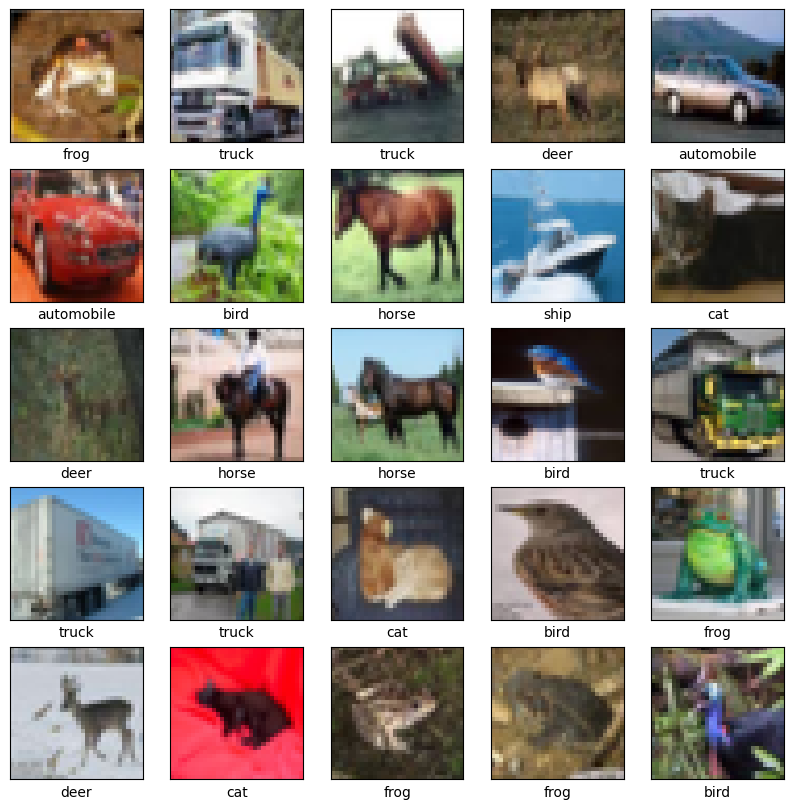

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Let's display the architecture of your model so far:

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3584 - loss: 1.7373 - val_accuracy: 0.5492 - val_loss: 1.2537
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5770 - loss: 1.1920 - val_accuracy: 0.5923 - val_loss: 1.1469
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6456 - loss: 1.0062 - val_accuracy: 0.6427 - val_loss: 1.0266
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6749 - loss: 0.9166 - val_accuracy: 0.6843 - val_loss: 0.9054
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7100 - loss: 0.8269 - val_accuracy: 0.7029 - val_loss: 0.8713
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7297 - loss: 0.7658 - val_accuracy: 0.7022 - val_loss: 0.8592
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7534 - loss: 0.6977 - val_accuracy: 0.6994 - val_loss: 0.8866
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7686 - loss: 0.6573 -

### Evaluate the model

313/313 - 0s - 2ms/step - accuracy: 0.7073 - loss: 0.8748


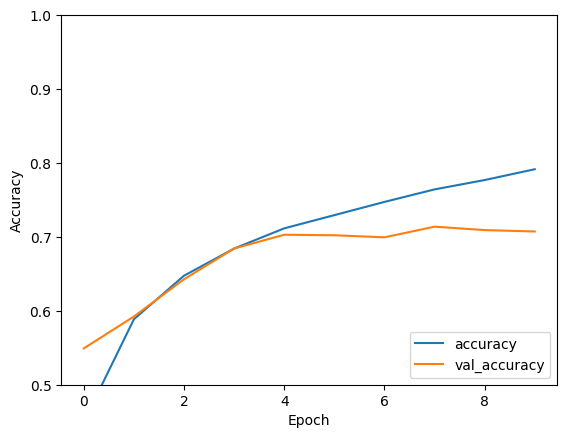

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.7073000073432922


# Redimensionnement des images de CIFAR-10

Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets



# Définir la nouvelle dimension cible
new_size = (224, 224)

# Fonction pour redimensionner les images
def resize_image(image, label):
    image = tf.image.resize(image, new_size)
    return image, label

# Créer des datasets et appliquer le redimensionnement par lot
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.map(resize_image, num_parallel_calls=tf.data.AUTOTUNE).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.map(resize_image, num_parallel_calls=tf.data.AUTOTUNE).batch(32)

# Vérification des dimensions d'un lot d'images redimensionnées
for images, labels in train_dataset.take(1):
    print("Dimensions d'un lot d'images redimensionnées:", images.shape)


Dimensions d'un lot d'images redimensionnées: (32, 224, 224, 3)


les images sont bien redimensionnées à la taille (224, 224, 3) pour chaque lot
de 32 images

# Re-entrainement avec une architecture de modele Inception (sans transfert learning)

In [13]:
from tensorflow.keras import layers, models

# Définir l'entrée
input_layer = layers.Input(shape=(32, 32, 3))

# Première couche de convolution
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)

# Bloc Inception - première étape
branch1 = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
branch2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
branch3 = layers.Conv2D(32, (5, 5), activation='relu', padding='same')(x)

# Fusion des branches
x = layers.concatenate([branch1, branch2, branch3])

# Ajout d'une autre couche de convolution et pooling
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Couche Flatten et Fully Connected
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

# Modèle final
model = models.Model(inputs=input_layer, outputs=output_layer)

# Compilation
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 32)     │            896 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 16, 16, 32)     │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 16, 16, 32)     │          1,056 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 16, 16, 32)     │          9,248 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 16, 16, 32)     │         25,632 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 96)     │              0 │ conv2d_8[0][0],        │
│                           │                        │                │ conv2d_9[0][0],        │
│                           │                        │                │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 16, 16, 64)     │         55,360 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 8, 8, 64)       │              0 │ conv2d_11[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 4096)           │              0 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │        262,208 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 10)             │            650 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 355,050 (1.35 MB)

 Trainable params: 355,050 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.2079 - loss: 2.1612 - val_accuracy: 0.2544 - val_loss: 2.2175
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3849 - loss: 1.7407 - val_accuracy: 0.3766 - val_loss: 1.7886
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4544 - loss: 1.5309 - val_accuracy: 0.4421 - val_loss: 1.5543
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4981 - loss: 1.3986 - val_accuracy: 0.5011 - val_loss: 1.3911
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5346 - loss: 1.3105 - val_accuracy: 0.4760 - val_loss: 1.4543
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5650 - loss: 1.2332 - val_accuracy: 0.5844 - val_loss: 1.1953
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5926 - loss: 1.1536 - val_accuracy: 0.5648 - val_loss: 1.2193
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6154 - loss: 1.1006 - val_accuracy: 0

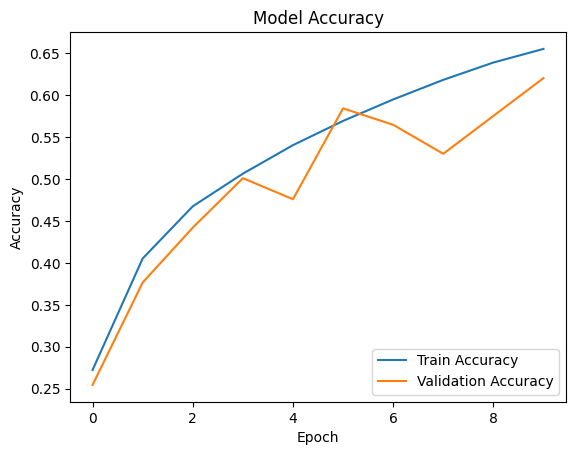

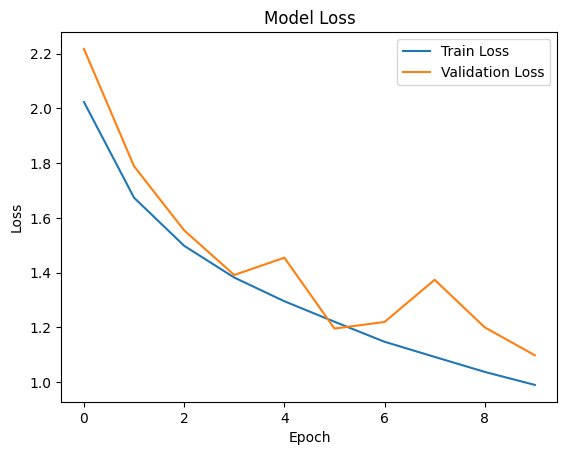

In [14]:
# Entraînement du modèle
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,  # Vous pouvez ajuster la taille du batch
    validation_data=(test_images, test_labels)
)

# Évaluation du modèle
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Tracer l'évolution de l'accuracy et de la loss
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


# Transfer learning : Re-entrainement avec un modele INCEPTION

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import SGD

# Charger l'architecture InceptionV3 avec des poids pré-entraînés sur ImageNet
# include_top=False pour enlever les couches de classification d'origine
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Geler les couches du modèle de base pour conserver les poids pré-entraînés
base_model.trainable = False

# Construire le modèle complet en ajoutant des couches de classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),  # Couche dense personnalisée
    layers.Dense(10, activation='softmax')  # Couche de sortie pour 10 classes de CIFAR-10
])

# Compiler le modèle avec l'optimiseur SGD et un taux d'apprentissage de 0.01
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_dataset,  # Dataset de train avec redimensionnement et lotissement
    validation_data=test_dataset,  # Dataset de test
    epochs=10  # Choisissez le nombre d'epochs selon vos besoins
)

# Afficher un résumé du modèle
model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 95ms/step - accuracy: 0.7366 - loss: 0.7872 - val_accuracy: 0.7982 - val_loss: 0.5886
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 164s 76ms/step - accuracy: 0.8261 - loss: 0.5050 - val_accuracy: 0.7948 - val_loss: 0.6008
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.8419 - loss: 0.4562 - val_accuracy: 0.8013 - val_loss: 0.6040
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 75ms/step - accuracy: 0.8525 - loss: 0.4207 - val_accuracy: 0.8115 - val_loss: 0.5878
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 75ms/step - accuracy: 0.8631 - loss: 0.3925 - val_accuracy: 0.8136 - val_loss: 0.5975
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 75ms/step - accuracy: 0.8728 - loss: 0.3682 - val_accuracy: 0.8096 - val_loss: 0.6304
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 0.8804 - loss: 0.3463 - val_accuracy: 0.8045 - val_loss: 0.6511
Epoch 8/10
1563/15

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,066,358 (84.18 MB)

 Trainable params: 131,786 (514.79 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 131,788 (514.80 KB)

In [15]:
# Évaluer le modèle sur le jeu de test
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.8046 - loss: 0.6921
Test Loss: 0.6996347904205322
Test Accuracy: 0.8058000206947327


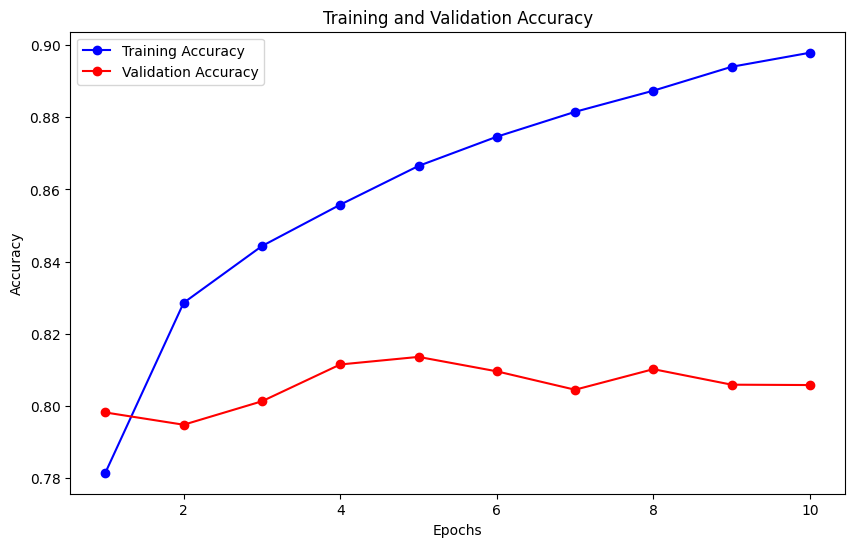

In [16]:
import matplotlib.pyplot as plt

# Extraire les données d'accuracy et de val_accuracy depuis l'historique d'entraînement
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1. CNN Normal
Accuracy (précision) : 70.73%
Loss (perte) : 0.8748
Points forts :
Modèle simple et rapide à entraîner.
Architecture adaptée aux images de petite taille comme celles de CIFAR-10 (32x32).
Limites :
Performances limitées par rapport aux architectures modernes.
Pas de mécanisme avancé pour capturer des caractéristiques complexes.
2. Inception (sans transfert learning)
Test Accuracy : 62.05%
Test Loss : 1.0975
Points forts :
Introduction des blocs Inception pour extraire des caractéristiques multi-échelles.
Plus sophistiqué que le CNN normal en termes de structure.
Limites :
Performances inférieures à celles du CNN normal, car le modèle part d’un entraînement depuis zéro, ce qui nécessite plus de données et de temps.
Le dataset CIFAR-10 est relativement petit pour un modèle aussi complexe, ce qui limite son potentiel.
3. Inception (avec transfert learning)
Test Accuracy : 80.58%
Test Loss : 0.6996
Points forts :
Utilise des poids pré-entraînés sur un grand dataset (ImageNet), ce qui donne un avantage significatif en termes de performance.
Performances globales supérieures, même avec un dataset CIFAR-10 relativement petit.
Temps d’entraînement réduit grâce au transfert des connaissances pré-apprises.
Limites :
Dépendance au dataset initialement utilisé pour le pré-entraînement (ImageNet).
Plus complexe et exigeant en ressources que le CNN normal.
